<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-5/blob/main/Entrega2_Reto_Equipo5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: TC4029.10 Ciencia y analitica de datos**
###Tecnológico de Monterrey

**Profr. Dra. María de la Paz Rico Fernández**

###**Entrega 2 (18/11) -> Clasificación-ensambles**

**EQUIPO 5:**

* **Laura Irán González Ojeda**
 *	Matrícula: A01794099

* **Marcela Alejandra Rosales Jiménez**
 *	 Matrícula: A01032022

Fecha de entrega: 18 de Noviembre de 2022

# Reto Entrega 2: Aguas subterráneas

## Instrucciones

Utilizando la base de datos que hayas elegido y hayas realizado su limpieza en la anterior entrega del reto, realiza lo siguiente:

- Selecciona tus variables independientes X y dependiente Y (semáforo)
- Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]
- Realiza un análisis general de las features importances a traves de decision trees o random forest.
- Selecciona las variables de mayor importancia.
- Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)
- Explora que clasificador es el más optimo, ejemplo:
 - Decision trees
 - Random Forest.
- Determina el grado de exactitud a través del reporte de clasificación y análisis de la gráfica de Precision Recall.
- Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.
- Realiza un reporte de los principales hallazgos y conclusiones del experimento e incluyelos en una presentación ejecutiva de 10 diapositivas. La presentación deberá incluir todos los pasos del pipeline seguidos, limpieza, análisis, kmeans, clasificación, resultados y conclusiones.

## Importar librerias y dataset

In [ ]:
# Importación de Librerías
import requests, zipfile
from io import BytesIO
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import  validation_curve, learning_curve
from sklearn.metrics import confusion_matrix
from sklearn import tree
import pydotplus 
from IPython.display import Image

In [ ]:
# Descarga de la Base de datos de calidad de agua
url = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'
filename = url.split('/')
req = requests.get(url)
zipfile= zipfile.ZipFile(BytesIO(req.content))
# Extracción del conjunto de datos
zipfile.extractall('/content/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo')
df_subterraneas = pd.read_csv("/content/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv",  encoding="cp1252")
df_subterraneas

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


## Limpieza de datos

Se realiza la limpieza del dataset como se documenta en la [entrega 1](Entrega1_Reto_Equipo5.ipynb) del Reto.


In [ ]:
# Funcion para rellenar valores NaN con numeros aleatorios
def fill_random(column_val):
    if np.isnan(column_val) == True: 
        column_val = random.uniform(start, stop)
    else:
         column_val = column_val
    return column_val

In [ ]:
# Eliminamos la columna SDT_mg/L ya que todos sus valores con NaN.
df_subterraneas.drop(columns=["SDT_mg/L"], inplace=True)

# Eliminamos la columna CLAVE ya que puede interferir en el análisis y tiene un valor distinto para cada renglón.
df_subterraneas.drop(columns=["CLAVE"], inplace=True)

promedio_alc_mgl = df_subterraneas["ALC_mg/L"].mean()
df_subterraneas['ALC_mg/L'] = df_subterraneas['ALC_mg/L'].fillna(promedio_alc_mgl)

mode_calidad_alc = df_subterraneas["CALIDAD_ALC"].mode()[0]
df_subterraneas['CALIDAD_ALC'] = df_subterraneas['CALIDAD_ALC'].replace(np.nan, mode_calidad_alc)

fill_var = df_subterraneas["CONDUCT_mS/cm"].mean()
df_subterraneas['CONDUCT_mS/cm'] = df_subterraneas['CONDUCT_mS/cm'].fillna(fill_var)

fill_var = df_subterraneas["CALIDAD_CONDUC"].mode()[0]
df_subterraneas['CALIDAD_CONDUC'] = df_subterraneas['CALIDAD_CONDUC'].replace(np.nan, fill_var)

df_subterraneas["SDT_M_mg/L"] = df_subterraneas["SDT_M_mg/L"].replace("<25", np.nan)
df_subterraneas["SDT_M_mg/L"] = df_subterraneas["SDT_M_mg/L"].astype(float)
fill_var = df_subterraneas["SDT_M_mg/L"].mean()
df_subterraneas['SDT_M_mg/L'] = df_subterraneas['SDT_M_mg/L'].replace(np.nan, fill_var)

fill_var = df_subterraneas["CALIDAD_SDT_ra"].mode()[0]
df_subterraneas['CALIDAD_SDT_ra'] = df_subterraneas['CALIDAD_SDT_ra'].replace(np.nan, fill_var)

fill_var = df_subterraneas["CALIDAD_SDT_salin"].mode()[0]
df_subterraneas['CALIDAD_SDT_salin'] = df_subterraneas['CALIDAD_SDT_salin'].replace(np.nan, fill_var)

fill_var = df_subterraneas["CALIDAD_DUR"].mode()[0]
df_subterraneas['CALIDAD_DUR'] = df_subterraneas['CALIDAD_DUR'].replace(np.nan, fill_var)

fill_var = df_subterraneas["CALIDAD_N_NO3"].mode()[0]
df_subterraneas['CALIDAD_N_NO3'] = df_subterraneas['CALIDAD_N_NO3'].replace(np.nan, fill_var)

df_subterraneas['CONTAMINANTES'] = df_subterraneas['CONTAMINANTES'].replace(np.nan, "Desconocido")

# DUR_mg/L contiene un renglón con valor NaN y 26 valores string.
# Vamos a ponerle a esos 27 valores el promedio de esa columna de los valores <20.
df_subterraneas["DUR_mg/L"] = df_subterraneas["DUR_mg/L"].replace("<20", np.nan)
df_subterraneas["DUR_mg/L"] = df_subterraneas["DUR_mg/L"].astype(float)
start = 0
stop = 19
df_subterraneas['DUR_mg/L'] = df_subterraneas['DUR_mg/L'].apply(fill_random)

# Se procederá a relizar el mismo proceso anterior para normalizar los datos con <0.20
df_subterraneas["N_NO3_mg/L"] = df_subterraneas["N_NO3_mg/L"].replace("<0.02", np.nan)
df_subterraneas["N_NO3_mg/L"] = df_subterraneas["N_NO3_mg/L"].astype(float)
start = 0.0
stop = 0.019
df_subterraneas['N_NO3_mg/L'] = df_subterraneas['N_NO3_mg/L'].apply(fill_random)

#Eliminamos los caracteres especiales '<' de las columnas numericas para evitar la pérdida de información
columns = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL', 'N_NO3_mg/L','AS_TOT_mg/L',
          'CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L'] 

df_subterraneas[columns] = df_subterraneas[columns].replace({'<':''}, regex=True)


In [ ]:
tmp = df_subterraneas.isna().sum().to_frame()
tmp[tmp[0]>0]

,0


In [ ]:
df_subterraneas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SITIO                 1068 non-null   object 
 1   ORGANISMO_DE_CUENCA   1068 non-null   object 
 2   ESTADO                1068 non-null   object 
 3   MUNICIPIO             1068 non-null   object 
 4   ACUIFERO              1068 non-null   object 
 5   SUBTIPO               1068 non-null   object 
 6   LONGITUD              1068 non-null   float64
 7   LATITUD               1068 non-null   float64
 8   PERIODO               1068 non-null   int64  
 9   ALC_mg/L              1068 non-null   float64
 10  CALIDAD_ALC           1068 non-null   object 
 11  CONDUCT_mS/cm         1068 non-null   float64
 12  CALIDAD_CONDUC        1068 non-null   object 
 13  SDT_M_mg/L            1068 non-null   float64
 14  CALIDAD_SDT_ra        1068 non-null   object 
 15  CALIDAD_SDT_salin    

Identificamos las columnas numéricas, categóricas y strings.

Estas listas no incluyen el target Semáforo.

In [ ]:
col_numericas = [
    "LONGITUD",
    "LATITUD",
    "PERIODO",
    "ALC_mg/L",
    "CONDUCT_mS/cm",
    "SDT_M_mg/L",
    "FLUORUROS_mg/L",
    "DUR_mg/L",
    "COLI_FEC_NMP/100_mL",
    "N_NO3_mg/L",
    "AS_TOT_mg/L",
    "CD_TOT_mg/L",
    "CR_TOT_mg/L",
    "HG_TOT_mg/L",
    "PB_TOT_mg/L",
    "MN_TOT_mg/L",
    "FE_TOT_mg/L",
]

col_categoricas = [
 'SUBTIPO',
 'CALIDAD_ALC',
 'CALIDAD_CONDUC',
 'CALIDAD_SDT_ra',
 'CALIDAD_SDT_salin',
 'CALIDAD_FLUO', 
 'CALIDAD_DUR',
 'CALIDAD_COLI_FEC',
 'CALIDAD_N_NO3',
 'CALIDAD_AS',
 'CALIDAD_CD',
 'CALIDAD_CR',
 'CALIDAD_HG',
 'CALIDAD_PB',
 'CALIDAD_MN',
 'CALIDAD_FE',
 'CUMPLE_CON_ALC',
 'CUMPLE_CON_COND',
 'CUMPLE_CON_SDT_ra',
 'CUMPLE_CON_SDT_salin',
 'CUMPLE_CON_FLUO',
 'CUMPLE_CON_DUR',
 'CUMPLE_CON_CF',
 'CUMPLE_CON_NO3',
 'CUMPLE_CON_AS',
 'CUMPLE_CON_CD',
 'CUMPLE_CON_CR',
 'CUMPLE_CON_HG',
 'CUMPLE_CON_PB',
 'CUMPLE_CON_MN',
 'CUMPLE_CON_FE'
]

col_strings = [
  'SITIO',
  'ORGANISMO_DE_CUENCA',
  'ESTADO',
  'MUNICIPIO',
  'ACUIFERO',  
  'CONTAMINANTES',
]

In [ ]:
#Cambio del tipo de dato Object a Float en variables definidas como numéricas 
df_subterraneas[col_numericas]= df_subterraneas[col_numericas].astype('float')

#Cambio del tipo de dato Object a Category en variables definidas como categóricas 
df_subterraneas[col_categoricas] = df_subterraneas[col_categoricas].astype('category')

In [ ]:
df_subterraneas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   SITIO                 1068 non-null   object  
 1   ORGANISMO_DE_CUENCA   1068 non-null   object  
 2   ESTADO                1068 non-null   object  
 3   MUNICIPIO             1068 non-null   object  
 4   ACUIFERO              1068 non-null   object  
 5   SUBTIPO               1068 non-null   category
 6   LONGITUD              1068 non-null   float64 
 7   LATITUD               1068 non-null   float64 
 8   PERIODO               1068 non-null   float64 
 9   ALC_mg/L              1068 non-null   float64 
 10  CALIDAD_ALC           1068 non-null   category
 11  CONDUCT_mS/cm         1068 non-null   float64 
 12  CALIDAD_CONDUC        1068 non-null   category
 13  SDT_M_mg/L            1068 non-null   float64 
 14  CALIDAD_SDT_ra        1068 non-null   category
 15  CALI

## Selecciona tus variables independientes X y dependiente Y (semáforo)


Para las variables independientes X se decidió no utilizar los features `SITIO`, `ORGANISMO_DE_CUENCA`, `ESTADO`, `MUNICIPIO` y `ACUIFERO` ya que dan informacion redundante.

Además, el feature `CONTAMINANTES` tiene demasiados valors nulos y podría sesgar el dataset.

In [ ]:
features = [
  #'SITIO',
  #'ORGANISMO_DE_CUENCA',
  #'ESTADO',
  #'MUNICIPIO',
  #'ACUIFERO',
  'SUBTIPO',
  'LONGITUD',
  'LATITUD',
  'PERIODO',
  'ALC_mg/L',
  'CALIDAD_ALC',
  'CONDUCT_mS/cm',
  'CALIDAD_CONDUC',
  'SDT_M_mg/L',
  'CALIDAD_SDT_ra',
  'CALIDAD_SDT_salin',
  'FLUORUROS_mg/L',
  'CALIDAD_FLUO',
  'DUR_mg/L',
  'CALIDAD_DUR',
  'COLI_FEC_NMP/100_mL',
  'CALIDAD_COLI_FEC',
  'N_NO3_mg/L',
  'CALIDAD_N_NO3',
  'AS_TOT_mg/L',
  'CALIDAD_AS',
  'CD_TOT_mg/L',
  'CALIDAD_CD',
  'CR_TOT_mg/L',
  'CALIDAD_CR',
  'HG_TOT_mg/L',
  'CALIDAD_HG',
  'PB_TOT_mg/L',
  'CALIDAD_PB',
  'MN_TOT_mg/L',
  'CALIDAD_MN',
  'FE_TOT_mg/L',
  'CALIDAD_FE',
  #'CONTAMINANTES',
  'CUMPLE_CON_ALC',
  'CUMPLE_CON_COND',
  'CUMPLE_CON_SDT_ra',
  'CUMPLE_CON_SDT_salin',
  'CUMPLE_CON_FLUO',
  'CUMPLE_CON_DUR',
  'CUMPLE_CON_CF',
  'CUMPLE_CON_NO3',
  'CUMPLE_CON_AS',
  'CUMPLE_CON_CD',
  'CUMPLE_CON_CR',
  'CUMPLE_CON_HG',
  'CUMPLE_CON_PB',
  'CUMPLE_CON_MN',
  'CUMPLE_CON_FE'
]
target = ['SEMAFORO']

## Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]

In [ ]:
df_subterraneas['SEMAFORO'].unique()

array(['Verde', 'Rojo', 'Amarillo'], dtype=object)

In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_subterraneas['SEMAFORO'] = label_encoder.fit_transform(df_subterraneas['SEMAFORO'])

In [ ]:
df_subterraneas['SEMAFORO'].unique()

array([2, 1, 0])

In [ ]:
# Correspondencia de clases no-numéricas a numéricas
label_encoder.inverse_transform([0, 1, 2])

array(['Amarillo', 'Rojo', 'Verde'], dtype=object)

Con LabelEncoding las clases quedan de la siguiente forma:

|Semáforo|Encoding|
|--------|--------|
|Amarillo|2|
|Rojo|1|
|Verde|0|

Además, se utiliza el label encoding para transformar las variables categóricas.

In [ ]:
feature_le = {}
for col in col_categoricas:
  label_encoder_features = preprocessing.LabelEncoder()
  df_subterraneas[col] = label_encoder_features.fit_transform(df_subterraneas[col])
  feature_le[col] = label_encoder_features

## Realiza un análisis general de las features importances a traves de decision trees o random forest.

Para este análisis se utilizan las variables previamente seleccionadas, las cuales incluye las variables numéricas y categóricas.

In [ ]:
Xfi = df_subterraneas[features]
yfi = df_subterraneas[target]

Para este ejercicio se utiliza el algoritmo Random Forest para determinar el feature importance.

In [ ]:
rf = RandomForestClassifier(random_state= 42)
rf.fit(Xfi, np.ravel(yfi))

RandomForestClassifier(random_state=42)

<BarContainer object of 48 artists>

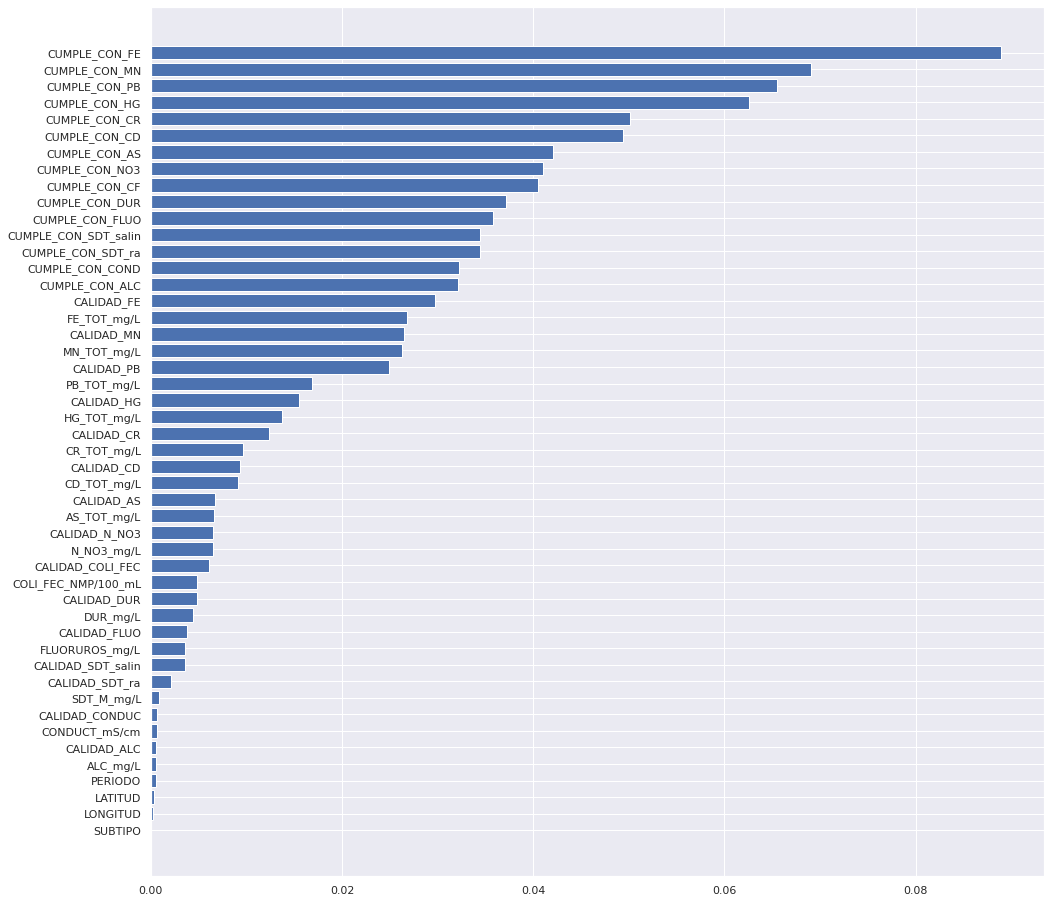

In [ ]:
# Graficamos las feature importances
sns.set(rc={'figure.figsize':(16,16)})
sorted_idx = rf.feature_importances_.argsort()
plt.barh(Xfi.columns, rf.feature_importances_[sorted_idx])

La correlación entre las características del dataset es la siguiente:

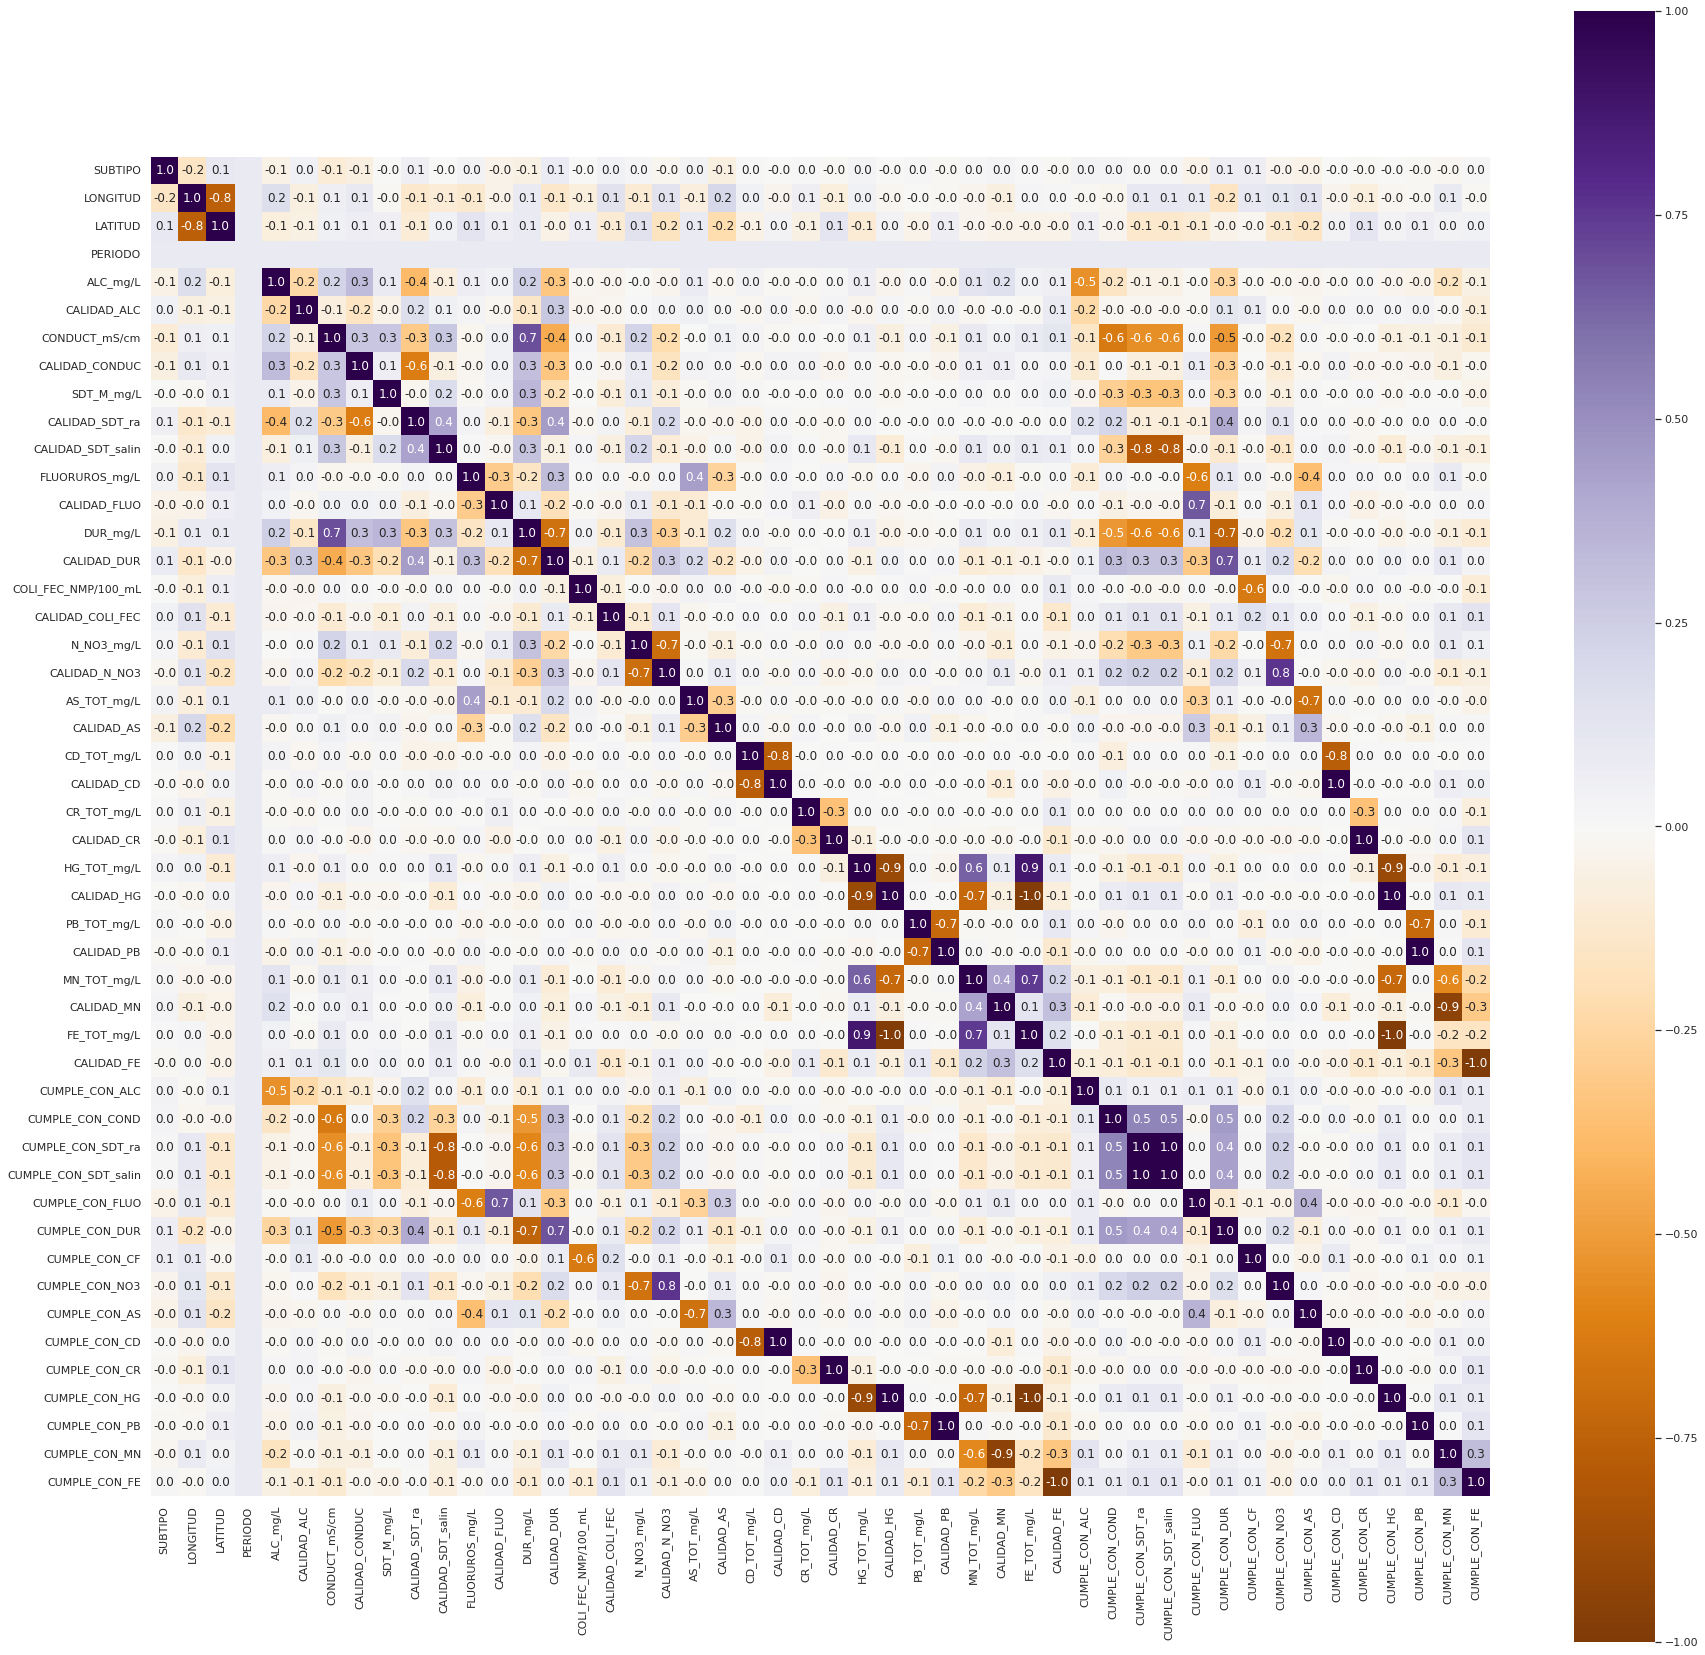

In [ ]:
correlation_matrix  = Xfi.corr(method='pearson')
f, ax = plt.subplots(figsize = (30, 30))
sns.heatmap(correlation_matrix, cmap='PuOr', annot=True, vmax = 1, vmin = -1, square = True,fmt=".1f");

Podemos ver que varias de las características tienen correlaciones negativas y positivas con otras variables del dataset. Esto nos indica que existe redundancia y sesgo a la información que ofrecen al análisis.

Por lo tanto es valioso reducir la cantidad de características que se utilizan para entrenar el modelo predictivo.

## Selecciona las variables de mayor importancia.


Para determinar el número de variables más óptimos realizamos distintas pruebas con varias cantidades.

In [ ]:
# Se hace un dataframe con el feature importance y su valor
df_feature_importance = pd.DataFrame(Xfi.columns, rf.feature_importances_[sorted_idx]).reset_index()

In [ ]:
# Se elige el top n de feature importance para entrenar un modelo posteriormente
n = 15
top_n = df_feature_importance.sort_values(by='index', ascending=False)[:n]
top_n

,index,0
47,0.088922,CUMPLE_CON_FE
46,0.069081,CUMPLE_CON_MN
45,0.065452,CUMPLE_CON_PB
44,0.062556,CUMPLE_CON_HG
43,0.050127,CUMPLE_CON_CR
42,0.049355,CUMPLE_CON_CD
41,0.042039,CUMPLE_CON_AS
40,0.041024,CUMPLE_CON_NO3
39,0.040504,CUMPLE_CON_CF
38,0.037206,CUMPLE_CON_DUR


In [ ]:
features_seleccionados = top_n[0].tolist()
target = ['SEMAFORO']

## Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)


In [ ]:
X = df_subterraneas[features_seleccionados]
y = df_subterraneas[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print('Full data features shape ', X.shape)
print('Full data output shape ', y.shape)

print('\nTrainig data features shape ', X_train.shape)
print('Trainig data output shape ', y_train.shape)

print('\nTesting data features shape ', X_test.shape)
print('Testing data output shape ', y_test.shape)

Full data features shape  (1068, 15)
Full data output shape  (1068, 1)

Trainig data features shape  (854, 15)
Trainig data output shape  (854, 1)

Testing data features shape  (214, 15)
Testing data output shape  (214, 1)


Utilizamos el parámetro `class_weight` en ambos modelos para balancear las clases del dataset.

In [ ]:
dtc = DecisionTreeClassifier(min_samples_split=3,
                             max_depth=6,
                             random_state=42,
                             class_weight='balanced')
dtc.fit(X_train, np.ravel(y_train))

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=3, random_state=42)

In [ ]:
rfc = RandomForestClassifier(random_state=42, class_weight='balanced')
rfc.fit(X_train, np.ravel(y_train))

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
yhat_train_dtc = dtc.predict(X_train)
yhat_test_dtc = dtc.predict(X_test)

In [ ]:
yhat_train_rfc = rfc.predict(X_train)
yhat_test_rfc = rfc.predict(X_test)

## Explora que clasificador es el más optimo, ejemplo: Decision trees o Random Forest.

Con el procedimiento que presentamos a continuación podemos concluir que el modelo entrenado con Random Forest tiene mejor resultado que el modelo de Decision Tree.

Random Forest obtuvo un accuracy de 99%, sin estar sobreentrenado. Mientras que Decision Tree obtuvo 94%.

Este resultado tiene sentido ya que Random Forest tiene una buena escalabilidad con conjuntos de datos con un elevado número de variables, el cual es el caso de este dataset. Además, Random Forest es un algoritmo más complejo ya que entrena varios árboles de decisión y considera las observaciones más óptimas de ellos.

## Determina el grado de exactitud a través del reporte de clasificación

**Reporte de clasificación para DecissionTreeClassifier**

In [ ]:
print("Reporte con conjunto de entrenamiento DecissionTreeClassifier")
print(classification_report(y_train, yhat_train_dtc, target_names=None))

Reporte con conjunto de entrenamiento DecissionTreeClassifier
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       198
           1       1.00      0.87      0.93       319
           2       0.87      1.00      0.93       337

    accuracy                           0.93       854
   macro avg       0.94      0.93      0.93       854
weighted avg       0.94      0.93      0.93       854



In [ ]:
print("Reporte con conjunto de pruebas DecissionTreeClassifier")
print(classification_report(y_test, yhat_test_dtc, target_names=None))

Reporte con conjunto de pruebas DecissionTreeClassifier
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        49
           1       1.00      0.79      0.89        68
           2       0.89      1.00      0.94        97

    accuracy                           0.92       214
   macro avg       0.92      0.90      0.91       214
weighted avg       0.92      0.92      0.91       214



*   El modelo no está subentrenado ya que su accuracy con el conjunto de pruebas es del 92%, lo cual es elevado.
*   El modelo tampoco está sobreentrenado ya que la diferencia del accuracy entre el conjunto de entrenamiento y el de prueba es mínima.

**Reporte de clasificación para RandomForestClassifier**

In [ ]:
print("Reporte con conjunto de entrenamiento RandomForestClassifier")
print(classification_report(y_train, yhat_train_rfc, target_names=None))

Reporte con conjunto de entrenamiento RandomForestClassifier
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       198
           1       1.00      1.00      1.00       319
           2       1.00      1.00      1.00       337

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854



In [ ]:
print("Reporte con conjunto de pruebas RandomForestClassifier")
print(classification_report(y_test, yhat_test_rfc, target_names=None))

Reporte con conjunto de pruebas RandomForestClassifier
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        49
           1       1.00      0.97      0.99        68
           2       1.00      1.00      1.00        97

    accuracy                           0.99       214
   macro avg       0.99      0.99      0.99       214
weighted avg       0.99      0.99      0.99       214



*   El modelo no está subentrenado ya que su accuracy con el conjunto de pruebas es del 99%, lo cual es elevado.
*   El modelo tampoco está sobreentrenado ya que la diferencia del accuracy entre el conjunto de entrenamiento y el de prueba es mínima.

## Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.


In [ ]:
from sklearn.metrics import confusion_matrix

def display_confusion_matrix(input_cm, plot_title=""):
  txt = ['Verdadero Verde ', 'Falso Verde', 'Falso Verde',
         'Falso Rojo', 'Verdadero Rojo', 'Falso Rojo',
         'Falso Amarillo', 'Falso Amarillo', 'Verdadero Amarillo']
  frecuencia = ["{0:0.0f}".format(value) for value in input_cm.flatten()]
  porcentaje = ["{0:.1%}".format(value) for value in input_cm.flatten()/np.sum(input_cm)]

  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt, frecuencia, porcentaje)]
  labels = np.asarray(labels).reshape(3,3)
  
  plt.figure(figsize = (8,8))
  plt.title(plot_title, fontsize=18, fontweight='bold')

  ax = sns.heatmap(input_cm, annot=labels, fmt='', cmap='Blues', cbar=False)
  ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")

In [ ]:
cm_dtc = confusion_matrix(yhat_test_dtc, y_test)
cm_rfc = confusion_matrix(yhat_test_rfc, y_test)

Recordemos que en encoding de cada clase es de la siguiente forma:

|Semáforo|Encoding|
|--------|--------|
|Amarillo|2|
|Rojo|1|
|Verde|0|

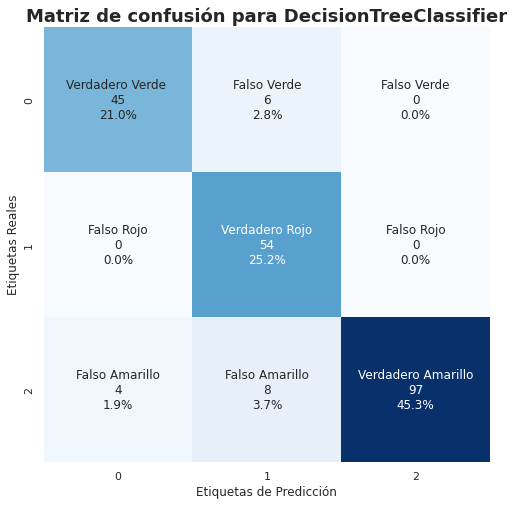

In [ ]:
display_confusion_matrix(cm_dtc, plot_title="Matriz de confusión para DecisionTreeClassifier")

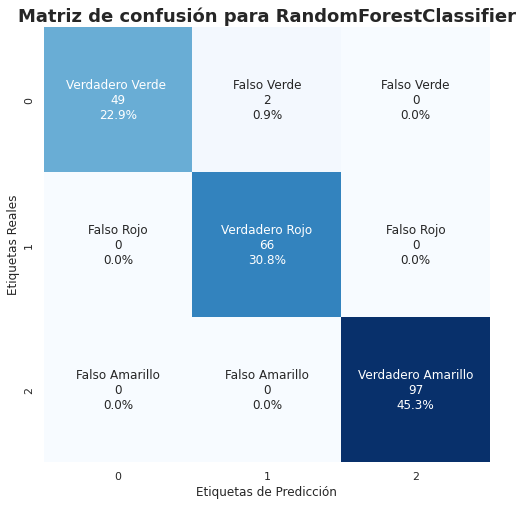

In [ ]:
display_confusion_matrix(cm_rfc, plot_title="Matriz de confusión para RandomForestClassifier")

- Podemos ver que la matriz de confusión de Random Forest clasifica mejor los Veraderos Verde y los Verdadero Rojo que el modelo de Decision Tree. 
- Random Forest también clasifica mejor los Falsos Positivos que Decision Tree. Por ejemplo, Decision Tree clasifica como Aguas no contaminadas (Verde) 4 muestras que en realidad presentan un grado medio de pureza (Amarillo).

**Gráfico del árbol de decisión**

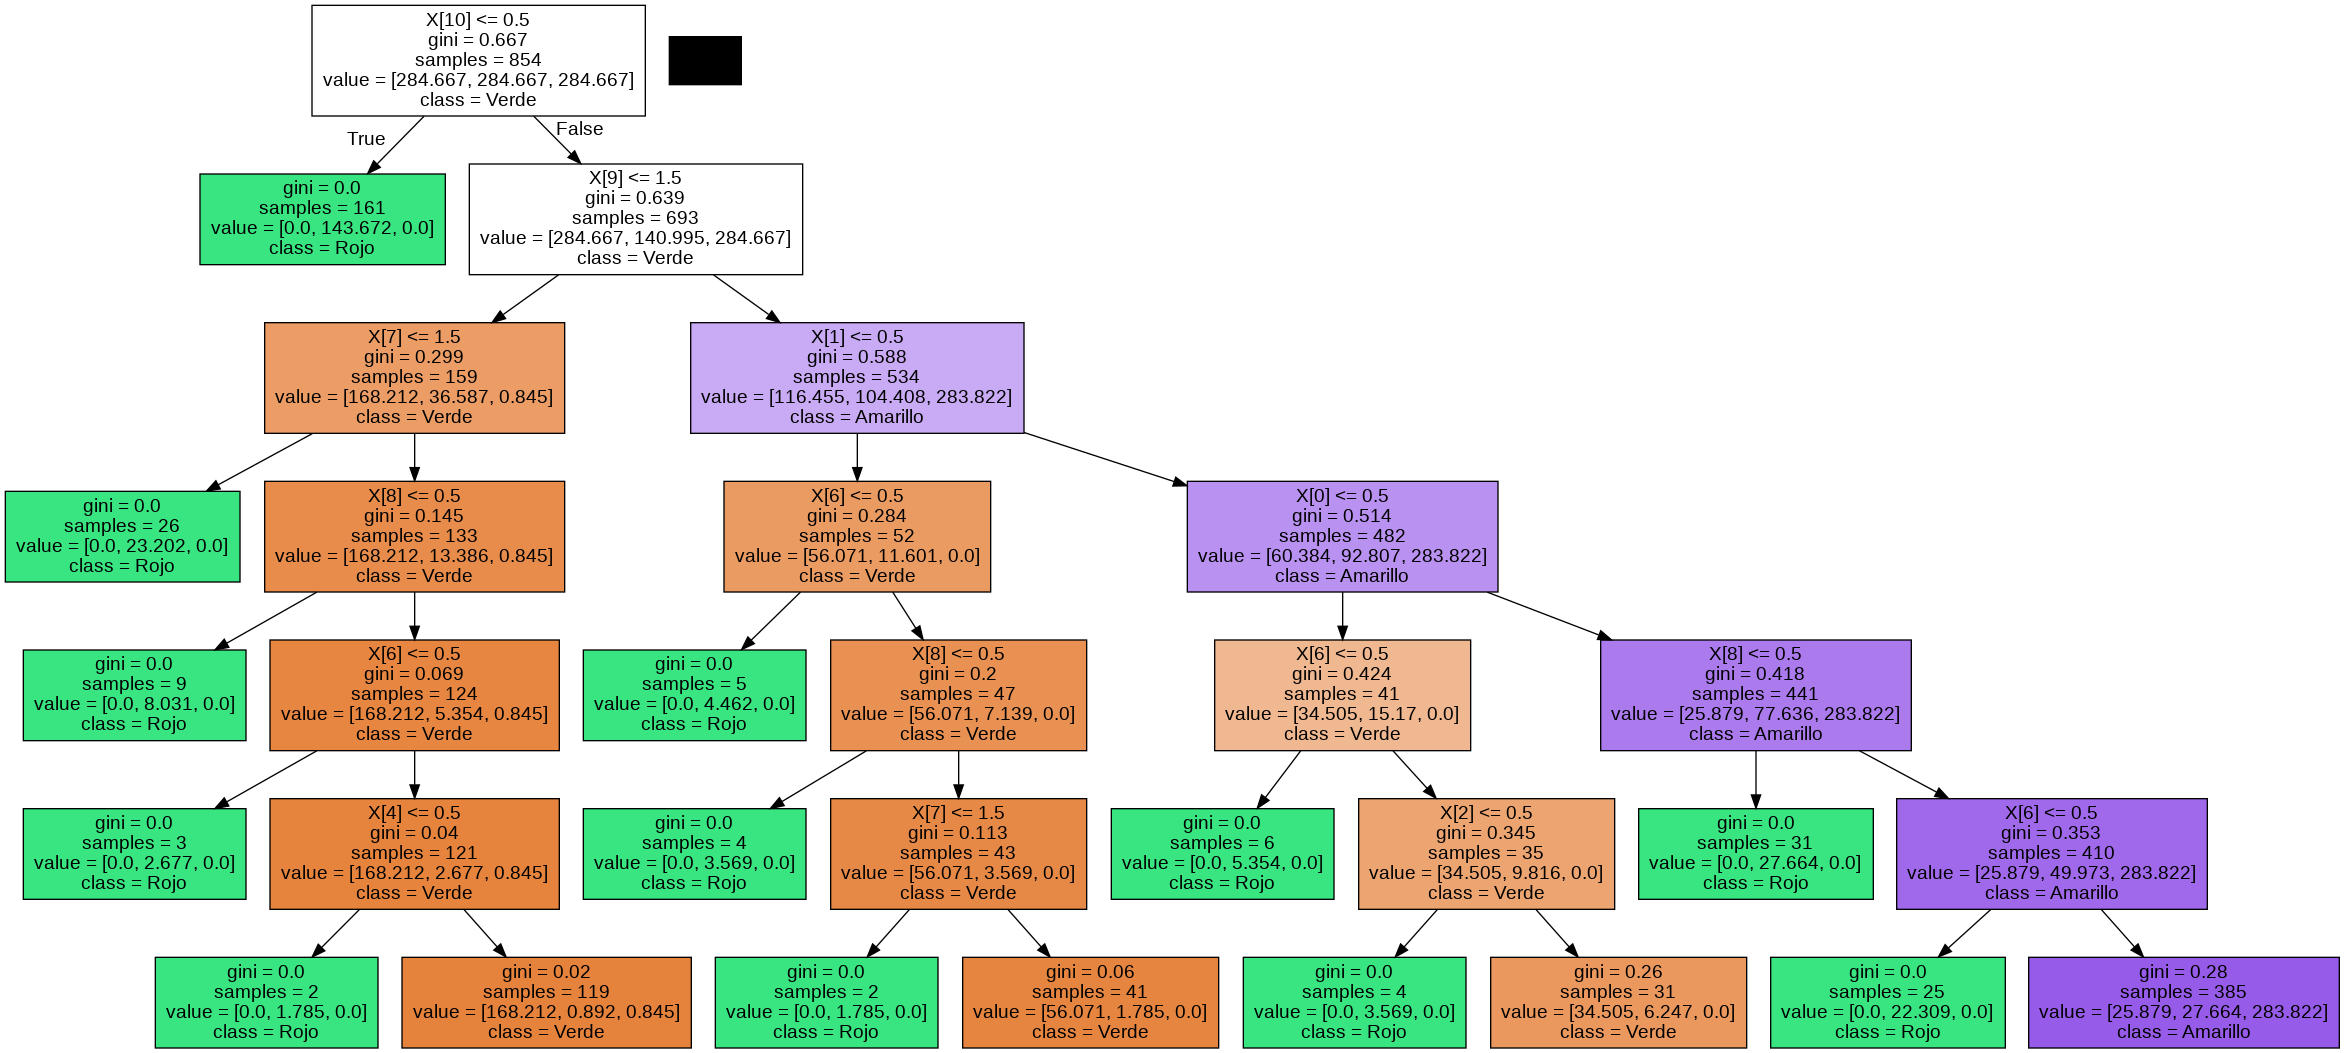

In [ ]:


dot_data = tree.export_graphviz(decision_tree=dtc,
                                class_names=['Verde', 'Rojo','Amarillo'],
                                filled=True,
                                rotate=False,
                                proportion=False)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Conclusión

Ambos algoritmos de clasificación dieron buenos resultados utilizando pocos parámetros de entrada, los mejores 15 de 55 variables utilizando la técnica de feature importance y eliminando variables que detectamos como redundantes.

El algoritmo de Decision Tree obtuvo un 92% de accuracy mientras que el de Ranfom Forest un 99%. 

Consideramos que buena parte del éxito de este ejercició se debe a la exhaustiva limpieza de datos, ya que procuramos salvar la mayor cantidad de muestras con estrategias estadísticas.

# Referencias

- scikit Learn. (2022). scikit-learn Machine Learning in Python: https://scikit-learn.org/stable/ . Recuperado el 18 de noviembre de 2022.


